## 20. 자연어처리

1) 워드 클라우드

- 단어의 크기를 단어의 빈도 수에 비례하도록 하여 단어를 아름답게 배치

In [1]:
import math, random, re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

ImportError: No module named 'matplotlib'

In [28]:
#데이터 과학 관련 키워드목록, 빈도 0~100
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

#### 아주 멋있어 보이기는 하지만, 딱히 어떤 정보를 제공하지는 않는다.

단어가 구인 광고에 등장하는 빈도를 가로축,
단어가 이력서에 등장하는 빈도를 세로축

In [29]:
def text_size(total):
    """equals 8 if total is 0, 28 if total is 200"""
    return 8 + total / 200 * 20

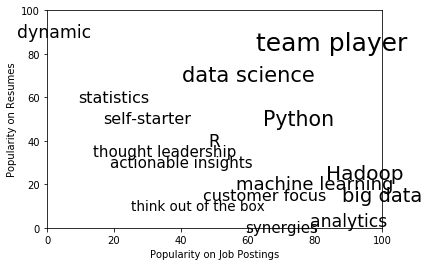

In [30]:
for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word,
             ha='center', va='center',
             size=text_size(job_popularity + resume_popularity))
plt.xlabel("Popularity on Job Postings")
plt.ylabel("Popularity on Resumes")
plt.axis([0, 100, 0, 100])
plt.show()

2) n-gram 모델

In [31]:
#유니코드 따옴표를 일반 아스키 따옴표로 변환
def fix_unicode(text):
    return text.replace(u"\u2019", "'")

In [59]:
def get_document():

    url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')

    #content = soup.find("div", "entry-content")       # NoneType Error
    content = soup.find("div", "article-body")         # find article-body div
    
    regex = r"[\w']+|[\.]"                             # 단어나 마침표에 해당하는 문자열

    document = []

    for paragraph in content("p"):
        words = re.findall(regex, fix_unicode(paragraph.text))
        document.extend(words)

    return document

In [72]:
document = get_document()
#document

["We've",
 'all',
 'heard',
 'it',
 'according',
 'to',
 'Hal',
 'Varian',
 'statistics',
 'is',
 'the',
 'next',
 'sexy',
 'job',
 '.',
 'Five',
 'years',
 'ago',
 'in',
 'What',
 'is',
 'Web',
 '2',
 '.',
 '0',
 'Tim',
 "O'Reilly",
 'said',
 'that',
 'data',
 'is',
 'the',
 'next',
 'Intel',
 'Inside',
 '.',
 'But',
 'what',
 'does',
 'that',
 'statement',
 'mean',
 'Why',
 'do',
 'we',
 'suddenly',
 'care',
 'about',
 'statistics',
 'and',
 'about',
 'data',
 'In',
 'this',
 'post',
 'I',
 'examine',
 'the',
 'many',
 'sides',
 'of',
 'data',
 'science',
 'the',
 'technologies',
 'the',
 'companies',
 'and',
 'the',
 'unique',
 'skill',
 'sets',
 '.',
 'The',
 'web',
 'is',
 'full',
 'of',
 'data',
 'driven',
 'apps',
 '.',
 'Almost',
 'any',
 'e',
 'commerce',
 'application',
 'is',
 'a',
 'data',
 'driven',
 'application',
 '.',
 "There's",
 'a',
 'database',
 'behind',
 'a',
 'web',
 'front',
 'end',
 'and',
 'middleware',
 'that',
 'talks',
 'to',
 'a',
 'number',
 'of',
 'other

In [71]:
###+순차적으로 등장하는 단어들에 대한 정보를 얻기 위함?
a = ["We've",'all','heard', 'it']
b = ["We've",'all','heard', 'it']
list(zip(a,b))

[('a', 'd'), ('b', 'e')]

In [76]:
bigrams = list(zip(document, document[1:]))
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)

In [77]:
#transitions
transitions

defaultdict(list,
            {'generation': ['of'],
             'initial': ['data'],
             'applied': ['to', 'to'],
             'already': ['reduced'],
             'verify': ['them'],
             'five': ['minutes'],
             'processing': ['companies', 'to', 'fails', '.', 'pipeline'],
             'throw': ['the'],
             'feedback': ['loop'],
             'they': ['leave',
              'visit',
              'contribute',
              'use',
              'go',
              "aren't",
              'had',
              'generate',
              'are',
              'decided'],
             'speak': ['coherently'],
             'thread': ['that'],
             'modern': ['web'],
             'made': ['yourself', 'the', 'recommendations', 'that'],
             'Factual': ['provide', 'enlists'],
             'alternative': ['but'],
             'creativity': ['for'],
             'presenting': ['that', 'data', 'results'],
             'versatile': ['According'],


In [78]:
transitions['.']

['Five',
 '0',
 'But',
 'The',
 'Almost',
 "There's",
 'But',
 'A',
 "It's",
 'Data',
 'One',
 'The',
 'Gracenote',
 'If',
 'Before',
 'If',
 'While',
 'Their',
 'CDDB',
 'Google',
 "Here's",
 'Facebook',
 'Amazon',
 'These',
 'They',
 'The',
 'Whether',
 "That's",
 'In',
 'Whether',
 'And',
 "It's",
 'Data',
 'The',
 'Using',
 'What',
 "We're",
 'To',
 'Data',
 'While',
 'At',
 'Sites',
 'Factual',
 'Much',
 '0',
 'The',
 'Mobile',
 'Point',
 'All',
 'Since',
 '6',
 'But',
 'RAM',
 'Hitachi',
 'Whether',
 'The',
 'Data',
 'The',
 'The',
 'Increased',
 "That's",
 'So',
 'We',
 'But',
 'Many',
 'They',
 'The',
 'This',
 'If',
 'Data',
 "You're",
 'It',
 'To',
 'Scripting',
 'Once',
 'Data',
 'If',
 'If',
 'In',
 "It's",
 'If',
 'Roger',
 'While',
 'To',
 'And',
 'Try',
 'Google',
 'Disambiguation',
 'When',
 "That's",
 'If',
 'For',
 '01',
 'If',
 '01',
 "We've",
 'Oil',
 'And',
 'The',
 "We're",
 'At',
 'What',
 'Information',
 'They',
 'They',
 'Most',
 'Traditional',
 'Managing',
 'T

In [39]:
#시작 단어를 선택해야 하는데,, 마침표 다음에 등장하는 단어들중 임의로 하나를 선택하는것도 방법.
def generate_using_bigrams(transitions):
    current = "."   # 다음단어가 문장의 시작이라는 것을 의미
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." 종료

In [40]:
random.seed(0)
print("bigram sentences")
for i in range(10):
    print(i, generate_using_bigrams(transitions))
print()
#터무니 없는 문장이지만, 데이터 과학과 관련되어 보일법한 웹사이트를 만들때 사용할 만한 것들이기도 하다...?

bigram sentences
0 But that's going to be current to generate a large searches correlates what that can be saying you can you want to figure out what's important role in enabling agile practices are then combine entrepreneurship with hundreds of track titles artists album .
1 CDDB views music by Jeff Hammerbacher said on the Philadelphia County by analyzing musical problem isn't the relational database .
2 If anything from machine consumable .
3 It was probably generated by their path .
4 Roger Magoulas who runs the metadata track titles .
5 The result .
6 Amazon understands that nobody remembers says that nobody remembers says that gave them open source R is really necessary for working with gathering data collection tools like the ability to be nice if it necessary to do data scientists particularly physicists rather than for distributing an audio stream processing companies banks and other disciplines it arrives and are easier to use .
7 Point of them open source the low 1 The Turk 

- bigram : 두개의 연속적인 단어
- trigram : 3개의 연속적인 단어를 보는..(n-gram도 있디만 3개 정도만 봐도 충분..)

In [ ]:
###+순차적으로 등장하는 단어들에 대한 정보를 얻기 위함?
a = ["We've",'all','heard', 'it']
b = ["We've",'all','heard', 'it']
b = ["We've",'all','heard', 'it']
list(zip(a,b))

In [42]:
#trigrams : 직전 두개의 단어에 의해 다음 단어가 결정됨
trigrams = list(zip(document, document[1:], document[2:]))
trigram_transitions = defaultdict(list)
starts = []

In [46]:
for prev, current, next in trigrams:
    if prev == ".":              # 만약 이전단어가 마침표 였다면
        starts.append(current)   # 이제 새로운 단어의 시작을 의미
    trigram_transitions[(prev, current)].append(next)

In [47]:
#운장은 앞서 바이그램과 비슷한 방식으로 생성할 수 있다
def generate_using_trigrams(starts, trigram_transitions):
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next = random.choice(next_word_candidates)

        prev, current = current, next
        result.append(current)

        if current == ".":
            return " ".join(result)

In [48]:
print("trigram sentences")
for i in range(10):
    print(i, generate_using_trigrams(starts, trigram_transitions))
print()
#조금 더 괜찮은 문장..

trigram sentences
0 In data science what you search for and uses it to a database of album metadata track titles .
1 More to the products they use .
2 GnuPlot is very effective R incorporates a fairly comprehensive graphics package Casey Reas' and Ben Fry's Processing is the state of the key component of a complex set of operations fails .
3 Facebook and LinkedIn have all tapped into their datastreams and made recommendations accordingly .
4 Increased storage capacity on every level .
5 While there are many libraries available for machine learning .
6 If you have to look at bits per dollar or raw capacity storage has more than kept pace with the customers' behavior the data itself and creates more data you will find to put into it .
7 The thread that ties most of these applications together is that they had built the world's largest production Hadoop application with 10 000 postings with the data .
8 They aren't well behaved XML files with all the data you can do something with it and 

- trigram을 사용하면 다음 단어를 생성하는 각 단계에서 선택할 수 있는 단어의 수가 bigram을 사용할 때마다 훨씬 적어졌고, 선택할 수 있는 단어가 딱 하나만 존재하는 경우도 많았을 것이다.
- 즉, 이미 어떤 문서상에 존재했던 문장(또는 긴문구)하나를 그대로 생성했을 가능성도 있다.
- 이는 데이터 과학에 대한 더 많은 에세이들을 모으고, 이를 토대로 n-gram 모델을 구축하는 것을 의미!

<p><span style="color:blue">**3) 문법**</span></p>

- 문법에 기반하여 말이 되는 문장을 생성하는 것
- 품사란 무엇이며, 그것들을 어떻게 조합하면 문장이 되는지..
- 명사 다음에는 항상 동사가 따른다...는 방식

In [79]:
#항목 앞에 밑줄이 있으면 더 확장할 수 있는 규칙이고, 나머지는 종결어 라고하자.
# 예, '_s'는 문장(sentence) 규칙을 의미, '_NP'는 명사구(noun phrase), '_VP'는 동사구
grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

~~~
['_S']
['_NP','_VP'] 
['_N','_VP'] 
['Python','_VP'] 
['Python','_V','_NP'] 
['Python','trains','_NP'] 
['Python','trains','_A','_NP','_P','_A','_N'] 
['Python','trains','logistic','_NP','_P','_A','_N']
['Python','trains','logistic','_N','_P','_A','_N'] 
['Python','trains','logistic','data science','_P','_A','_N'] 
['Python','trains','logistic','data science','about','_A', '_N'] 
['Python','trains','logistic','data science','about','logistic','_N'] 
['Python','trains','logistic','data science','about','logistic','Python'] 
~~~

In [80]:
# 특정 항목이 종결어인지 아닌지?
def is_terminal(token):
    return token[0] != "_"

# 각 항목을 대체 가능한 다른 항목 또는 항목들로 변환시키는 함수
def expand(grammar, tokens):
    for i, token in enumerate(tokens):

        # 종결어는 건너뜀
        if is_terminal(token): continue

        # 종결어가 아닌 단어는 대체할 수 있는 항목을 임의로 선택
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        # 새로운 단어의 list에 expand를 적용
        return expand(grammar, tokens)

    # 이제 모든 단어가 종결어 이기때문에 종료
    return tokens

def generate_sentence(grammar):
    return expand(grammar, ["_S"])

print("grammar sentences")
for i in range(10):
    print(i, " ".join(generate_sentence(grammar)))
print()

grammar sentences
0 Python trains
1 logistic data science about linear Python learns regression
2 big data science near linear regression trains linear big Python near logistic regression about linear Python
3 logistic linear Python near linear data science about big Python trains
4 big linear data science near linear regression about linear Python is
5 big logistic big Python about logistic Python about linear regression near big regression trains linear data science near logistic data science
6 linear linear regression near linear Python about logistic data science learns
7 logistic big data science about linear Python near logistic data science learns
8 logistic linear linear data science about logistic data science near linear regression near big regression tests logistic big linear linear Python near big regression near big regression about big Python near linear data science
9 regression learns big regression about linear regression



<p><span style="color:blue">**5) 토픽 모델링**</span></p>

In [94]:
#단어의 분포에 따라 각 토픽에 weight를 할당
def sample_from(weights):
    '''i를 weight[i] / sum(weight)의 확률로 반환'''
    total = sum(weights)
    rnd = total * random.random()       # 0과 total 사이를 균일하게 선택
    for i, w in enumerate(weights):
        rnd -= w                        # return the smallest i such that
        if rnd <= 0: return i           # sum(weights[:(i+1)]) >= rnd

~~~
결국, weight가 [1,1,3] 이라면 
1/5의 확룔로 0, 
1/5의 확률로 1, 
3/5의 확률로 2를 반환
~~~

In [83]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [87]:
#총 K=4개의 토픽을 반환해 보자!
K = 4

#각 토픽이 각 문서에 할당되는 횟수 (Counter는 각각의 문서를 의미)
document_topic_counts = [Counter()
                         for _ in documents]

#각 단어가 각 토픽에 할당되는 횟수 (Counter는 각 토픽을 의미)
topic_word_counts = [Counter() for _ in range(K)]

#각 토픽에 할당죄는 총 단어수 (각각의 숫자는 각 토픽을 의미)
topic_counts = [0 for _ in range(K)]

#각 문서에 포함되는 총 단어수 (각각의 숫자는 각 문서를 의미)
document_lengths = [len(d) for d in documents]

#단어 종류의 수
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

#총 문서의 수
D = len(documents)

In [88]:
# documents[3]의 문서중 토픽 1과 관련 있는 단어의 수를 구하면.
document_topic_counts[3][1]

0

In [89]:
#npl라는 단어가 토픽 2와 연관지어 나오는 횟수는?
topic_word_counts[2]["nlp"]

0

In [90]:
def p_topic_given_document(topic, d, alpha=0.1):
    """문서 d의 모든 단어 중에서 topic에 속하는
    단어의 비율 (smoothing을 더한 비율)"""

    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    """topic에 속한 단어 중에서 word의 비율 (smoothing을 더한 비율)"""

    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

def topic_weight(d, word, k):
    """문서와 문서의 단어가 주어지면, k번째 토픽의 weight를 반환"""

    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

In [95]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1        

In [93]:
#토픽의 의미를 찾기위해 각 토픽에 대해 가장 영향력이 높은(weight 값이 큰) 단어들이 무언인지 보자
for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print(k, word, count)

0 pandas 2
0 scikit-learn 2
0 regression 1
0 statistics 1
0 artificial intelligence 1
0 Java 1
0 Big Data 1
0 Hadoop 1
0 statsmodels 1
0 HBase 1
0 libsvm 1
0 R 1
0 C++ 1
0 Haskell 1
1 neural networks 2
1 deep learning 2
1 databases 1
1 Postgres 1
1 numpy 1
1 MySQL 1
1 Cassandra 1
1 MongoDB 1
1 Mahout 1
1 Python 1
1 HBase 1
1 theory 1
1 decision trees 1
2 regression 2
2 Java 2
2 R 2
2 Python 2
2 Postgres 1
2 machine learning 1
2 statistics 1
2 artificial intelligence 1
2 MongoDB 1
2 HBase 1
2 Cassandra 1
2 mathematics 1
2 probability 1
2 statsmodels 1
2 C++ 1
2 scipy 1
3 Big Data 2
3 probability 2
3 machine learning 1
3 R 1
3 statistics 1
3 programming languages 1
3 NoSQL 1
3 libsvm 1
3 support vector machines 1
3 Spark 1
3 Python 1
3 MapReduce 1
3 Storm 1


In [96]:
# 단어들을 보고 다음고 ㅏ같이 이름을 지정해주자
topic_names = ["Big Data and programming languages",
               "databases",
               "machine learning",
               "statistics"]

#사용자의 관심사가 무엇인지 알아볼 수 있다.
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
statistics 5
Big Data and programming languages 4
machine learning 4

['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
machine learning 5
databases 3
statistics 2

['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Big Data and programming languages 6
machine learning 4
databases 2

['R', 'Python', 'statistics', 'regression', 'probability']
machine learning 6
Big Data and programming languages 3
statistics 1

['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 3
statistics 3
databases 2

['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming languages 5
machine learning 4
statistics 3

['statistics', 'probability', 'mathematics', 'theory']
databases 3
Big Data and programming languages 2
statistics 2
machine learning 1

['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
databases 4
Big Data and programming langua